### Training set data distribution

In [6]:
import pickle


x_utube_training = pickle.load(open("data/x-train", "rb"))
y_utube_training = pickle.load(open("data/y-train", "rb"))

In [7]:
x_utube_training.shape

(28800, 12)

In [8]:
x_utube_training.describe()

,channel_subscribers,channel_videos,channel_views,video_comments,video_dislikes,video_likes,video_views
count,2.880000e+04,28800.000000,2.880000e+04,28800.000000,2.880000e+04,2.880000e+04,2.880000e+04
mean,3.868475e+06,4413.583681,1.535071e+09,2472.685312,1.286127e+03,2.239556e+04,2.641511e+06
std,6.028908e+06,14073.668854,3.153868e+09,9132.794099,8.628803e+03,1.471197e+05,2.986568e+07
min,0.000000e+00,12.000000,1.863240e+05,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.315150e+05,303.000000,1.174793e+08,49.000000,2.700000e+01,3.360000e+02,3.497075e+04
50%,1.424711e+06,692.000000,3.962555e+08,382.000000,1.680000e+02,2.788000e+03,3.446555e+05
75%,4.713043e+06,2065.000000,1.469493e+09,1861.000000,8.340000e+02,1.516125e+04,1.707797e+06
max,3.452421e+07,142439.000000,2.631521e+10,793927.000000,1.004742e+06,1.759136e+07,3.773968e+09


#### Plots

In [9]:
import matplotlib.pyplot as utube_plot
import pandas as pd
import numpy as np

train_set = pd.concat([ x_utube_training, y_utube_training ], axis=1)
clickbait_set = train_set[ train_set["label"] == 1 ]
non_clickbait_set = train_set[ train_set["label"] == 0 ]

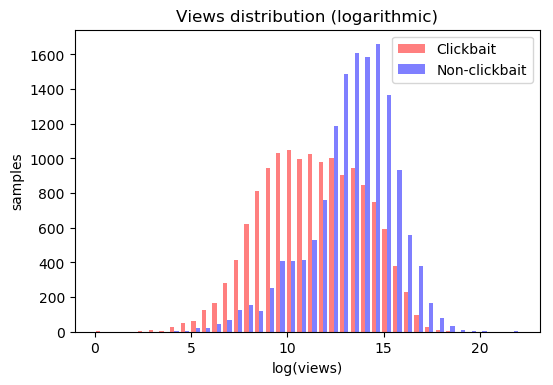

In [10]:
utube_plot.figure(figsize=(6, 4), dpi=100)
clickbait_views_log = clickbait_set["video_views"].apply(np.log).replace([-np.inf], 0)
non_clickbait_views_log = non_clickbait_set["video_views"].apply(np.log).replace([-np.inf], 0)
utube_plot.hist(
    [clickbait_views_log, non_clickbait_views_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
utube_plot.title("Views distribution (logarithmic)")
utube_plot.xlabel("log(views)")
utube_plot.ylabel("samples")
utube_plot.legend(loc='upper right')
utube_plot.savefig("views-distribution-log", bbox_inches='tight')
utube_plot.show()

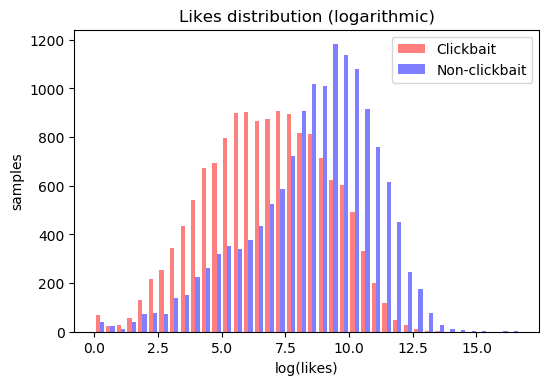

In [11]:
utube_plot.figure(figsize=(6, 4), dpi=100)
clickbait_likes_log = clickbait_set["video_likes"].apply(np.log).replace([-np.inf], 0)
non_clickbait_likes_log = non_clickbait_set["video_likes"].apply(np.log).replace([-np.inf], 0)

utube_plot.hist(
    [clickbait_likes_log, non_clickbait_likes_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)

utube_plot.title("Likes distribution (logarithmic)")
utube_plot.xlabel("log(likes)")
utube_plot.ylabel("samples")
utube_plot.legend(loc='upper right')
utube_plot.savefig("likes-distribution-log", bbox_inches='tight')
utube_plot.show()

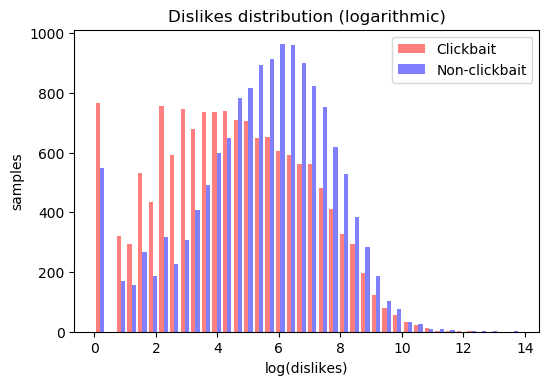

In [12]:
utube_plot.figure(figsize=(6, 4), dpi=100)
clickbait_dislikes_log = clickbait_set["video_dislikes"].apply(np.log).replace([-np.inf], 0)
non_clickbait_dislikes_log = non_clickbait_set["video_dislikes"].apply(np.log).replace([-np.inf], 0)
utube_plot.hist(
    [clickbait_dislikes_log, non_clickbait_dislikes_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
utube_plot.title("Dislikes distribution (logarithmic)")
utube_plot.xlabel("log(dislikes)")
utube_plot.ylabel("samples")
utube_plot.legend(loc='upper right')
utube_plot.savefig("dislikes-distribution-log", bbox_inches='tight')
utube_plot.show()

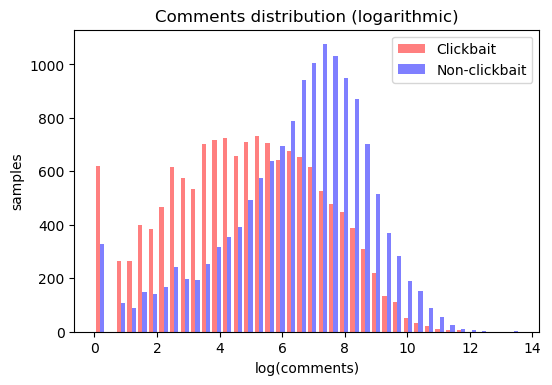

In [13]:
utube_plot.figure(figsize=(6, 4), dpi=100)
clickbait_comments_log = clickbait_set["video_comments"].apply(np.log).replace([-np.inf], 0)
non_clickbait_comments_log = non_clickbait_set["video_comments"].apply(np.log).replace([-np.inf], 0)
utube_plot.hist(
    [clickbait_comments_log, non_clickbait_comments_log], 
    bins=40, 
    color=["red", "blue"], 
    label=["Clickbait", "Non-clickbait"], 
    alpha=0.5
)
utube_plot.title("Comments distribution (logarithmic)")
utube_plot.xlabel("log(comments)")
utube_plot.ylabel("samples")
utube_plot.legend(loc='upper right')
utube_plot.savefig("comments-distribution-log", bbox_inches='tight')
utube_plot.show()

### Feature extraction

In [14]:
import re
import emoji
from gensim.parsing.preprocessing import *


def tokenize(string):

    """ Tokenizes a string """

    stop_words = [
        "about", "an", "are", "as", "at", "be", "by", "com", "for", "from", "in", "is", "it", "of",
        "on", "or", "that", "the", "this", "to", "was", "what", "when", "where", "who", "with",
        "the", "www"
    ]

    string = strip_short(
        strip_multiple_whitespaces(
            strip_punctuation(
                split_alphanum(string))),
        minsize=2)
    
    emojis = [c for c in string if c in emoji.UNICODE_EMOJI]
    
    string = stem_text(re.sub(r"[^\w\s,]", "", string))
    
    tokens = string.split() + emojis

    for stop_word in stop_words:
        try:
            tokens.remove(stop_word)
        except:
            pass

    return tokens

C:\Users\Abhishek\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


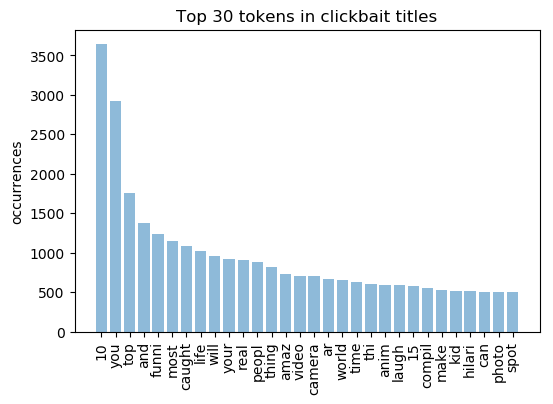

In [15]:
from sklearn.feature_extraction.text import CountVectorizer


countvect = CountVectorizer(
    lowercase=False,
    tokenizer=tokenize
).fit(clickbait_set["video_title"])
bag_of_words = countvect.transform(clickbait_set["video_title"])
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, i]) for word, i in countvect.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

labels = list()
freqs = list()

for word in words_freq[:30]:
    labels.append(word[0])
    freqs.append(word[1])

utube_plot.figure(figsize=(6, 4), dpi=100)
utube_plot.bar(range(30), freqs, alpha=0.5)
utube_plot.xticks(range(30), labels, rotation="vertical")
utube_plot.title("Top 30 tokens in clickbait titles")
utube_plot.ylabel("occurrences")
utube_plot.savefig("top-30-clickbait-tokens", bbox_inches='tight')
utube_plot.show()